c:\Users\HP\Downloads\install\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\Downloads\install\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP\Downloads\install\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:51:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\x

Model Performansları (Accuracy Skoru):
Random Forest: 0.8444
Gradient Boosting: 0.8222
XGBoost: 0.8222
Logistic Regression: 0.7778
Naive Bayes: 0.7778
AdaBoost: 0.7556
Decision Tree: 0.6889
Support Vector Machine: 0.5556
K-Nearest Neighbors: 0.5111
Perceptron: 0.4444


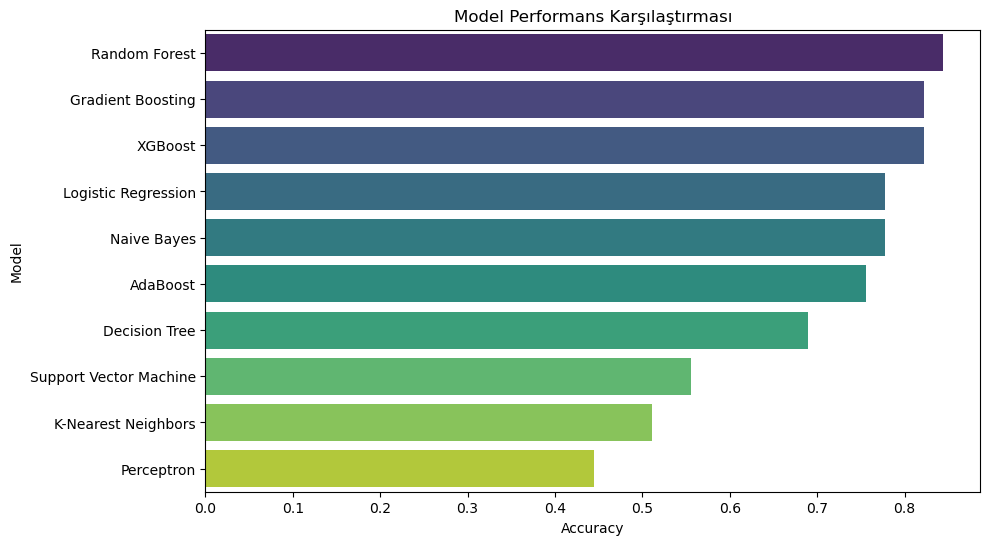

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Veri setini yükleme
df = pd.read_csv('veri.csv')

# Veriyi ön işleme
label_encoder = LabelEncoder()
df['Income'] = label_encoder.fit_transform(df['Income'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Credit History'] = label_encoder.fit_transform(df['Credit History'])

# Özellikler (X) ve hedef değişken (y)
X = df.drop('Credit Approval', axis=1)
y = df['Credit Approval']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modellerin listesi
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Model değerlendirme
results = {}

for model_name, model in models.items():
    # Modeli eğitme
    model.fit(X_train, y_train)
    
    # Tahmin yapma
    y_pred = model.predict(X_test)
    
    # Doğruluk skorunu hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Sonuçları sıralama
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Sonuçları yazdırma
print("Model Performansları (Accuracy Skoru):")
for model_name, accuracy in sorted_results:
    print(f"{model_name}: {accuracy:.4f}")

# En iyi modeli kaydetme (joblib)
best_model_name = sorted_results[0][0]
best_model = models[best_model_name]
joblib.dump(best_model, 'eniyi.joblib')

# Model doğruluklarını görselleştirme
model_names = [model_name for model_name, _ in sorted_results]
accuracies = [accuracy for _, accuracy in sorted_results]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.title("Model Performans Karşılaştırması")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()
